In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import src.Teleconnection.season_eof as season_eof
import src.Teleconnection.tools as tools

import numpy as np

In [2]:
zg = xr.open_dataset("/work/mh0033/m300883/Tel_MMLE/data/MPI_GE_onepct/zg_lonlatboxed/allens.nc")

In [3]:
zg_data = tools.split_ens(zg)

In [4]:
# split the ens 
zg_data = zg_data.var156

In [5]:
spm = zg_data.sel(plev = 50000).mean(dim = ('lon','lat'))

In [6]:
spm = spm/1000

In [7]:
spm_ensmean = spm.mean(dim = 'ens')

In [8]:
spm_max = spm.max(dim = 'ens')
spm_min = spm.min(dim = 'ens')

In [9]:
spm_min

<xarray.DataArray 'var156' (time: 149)>
array([5.380846 , 5.3879747, 5.3856835, 5.3932633, 5.3874755, 5.384367 ,
       5.391591 , 5.387586 , 5.386042 , 5.396138 , 5.391996 , 5.3911734,
       5.390588 , 5.401347 , 5.3975496, 5.3945675, 5.397231 , 5.3989987,
       5.4025545, 5.4008036, 5.3987155, 5.4072084, 5.3956113, 5.3943763,
       5.399225 , 5.4004183, 5.398707 , 5.398981 , 5.4023795, 5.413056 ,
       5.4111495, 5.405937 , 5.4031854, 5.408685 , 5.4054165, 5.4073415,
       5.4100513, 5.402768 , 5.410107 , 5.4017935, 5.4116693, 5.4200273,
       5.413963 , 5.410495 , 5.417503 , 5.4199047, 5.4194217, 5.415474 ,
       5.4190063, 5.4191194, 5.4204926, 5.4243917, 5.4192266, 5.4170785,
       5.4257016, 5.425438 , 5.4208603, 5.428438 , 5.421175 , 5.4244905,
       5.42531  , 5.432194 , 5.4300656, 5.431005 , 5.4322624, 5.4308677,
       5.4339848, 5.430253 , 5.432779 , 5.4353   , 5.4372973, 5.433638 ,
       5.4397225, 5.437794 , 5.4389944, 5.4375353, 5.440432 , 5.4471483,
       5.4409475, 5.435845 , 5.4431086, 5.4492917, 5.4418664, 5.4421744,
       5.442273 , 5.450008 , 5.4442215, 5.443757 , 5.450122 , 5.458887 ,
       5.452127 , 5.451662 , 5.452935 , 5.4523654, 5.454894 , 5.4539757,
       5.4579206, 5.4584765, 5.4594803, 5.4594026, 5.4584103, 5.4618382,
       5.465936 , 5.4581027, 5.466085 , 5.462202 , 5.467393 , 5.4581304,
       5.4628983, 5.461956 , 5.4575496, 5.4590983, 5.4682045, 5.477263 ,
       5.471486 , 5.468416 , 5.4751716, 5.471097 , 5.4713473, 5.472299 ,
       5.475487 , 5.4803624, 5.466679 , 5.4788866, 5.476293 , 5.480984 ,
       5.477025 , 5.484024 , 5.4791503, 5.4820647, 5.488599 , 5.4836726,
       5.482809 , 5.4983478, 5.4866586, 5.4878016, 5.49194  , 5.491073 ,
       5.4884486, 5.493254 , 5.4940987, 5.491192 , 5.490176 , 5.4976506,
       5.501142 , 5.493127 , 5.4929295, 5.496005 , 5.4976845],
      dtype=float32)
Coordinates:
    plev     float64 5e+04
  * time     (time) object 1851-03-16 11:52:00 ... 1999-03-16 11:52:00

([<matplotlib.axis.YTick at 0x7f28b51c4760>,
 [Text(0, 5.4, '5.4'), Text(0, 5.5, '5.5')])

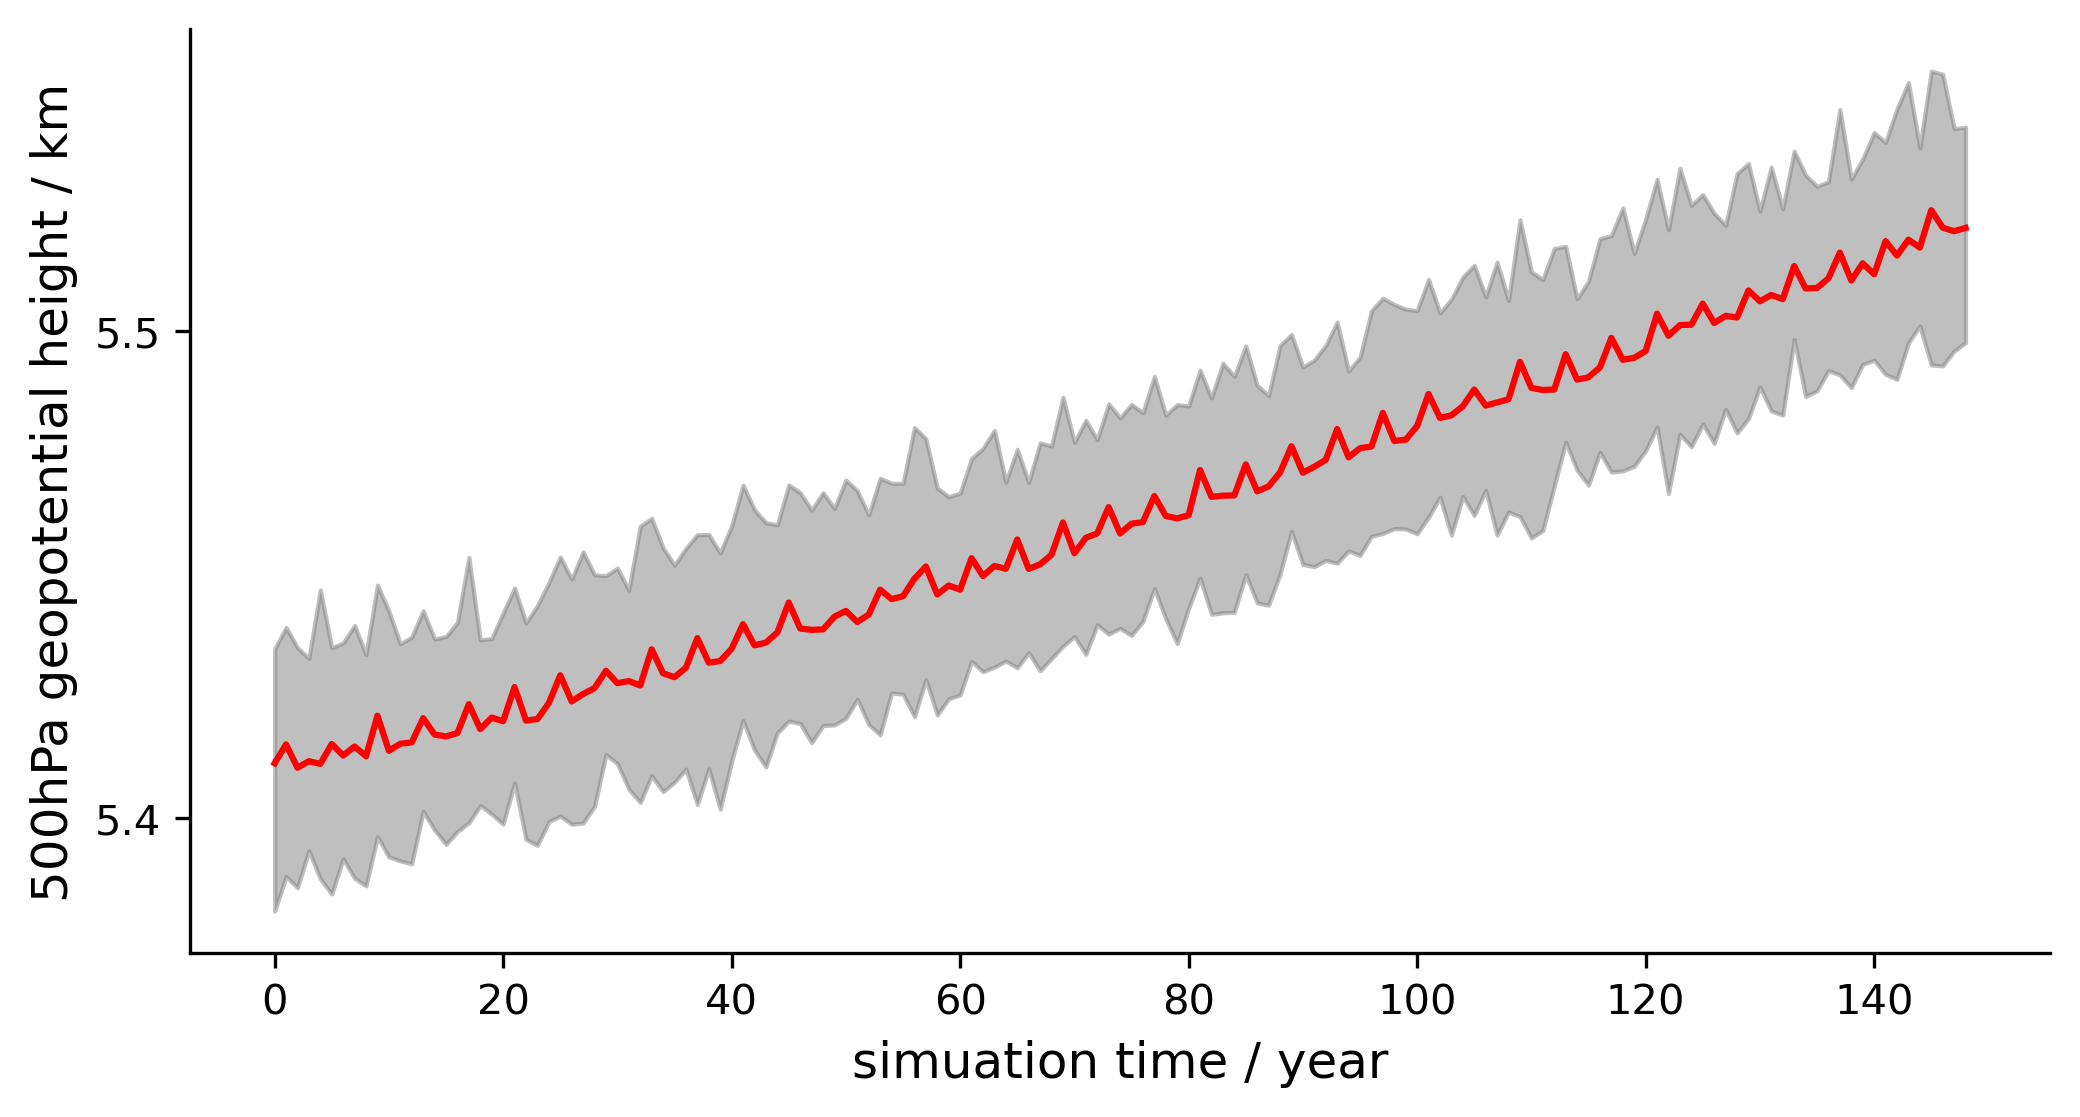

In [10]:
# fig with 300 dpi
plt.figure(figsize = (8,4),dpi = 300)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.plot(np.arange(0,149),spm_ensmean,color = 'red')
plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0.5)

# no boundary line in upper and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ylalbel as "500hPa geopotential height (km)"
plt.ylabel("500hPa geopotential height / km", fontsize = 12)
# x label as "simuation time (year)"
plt.xlabel("simuation time / year", fontsize = 12)

# only show the yticks and labels on [5.4,5.5]
plt.yticks(np.arange(5.4,5.6,0.1),np.arange(5.4,5.6,0.1))




In [17]:
spm_demean = spm - spm_ensmean
spm_demean = spm_demean + spm_ensmean[0]

In [18]:
spm_demeanmax = spm_demean.max(dim = 'ens')
spm_demeanmin = spm_demean.min(dim = 'ens')

([<matplotlib.axis.YTick at 0x7f28ae294ca0>,
 [Text(0, 5.4, '5.4'), Text(0, 5.5, '5.5')])

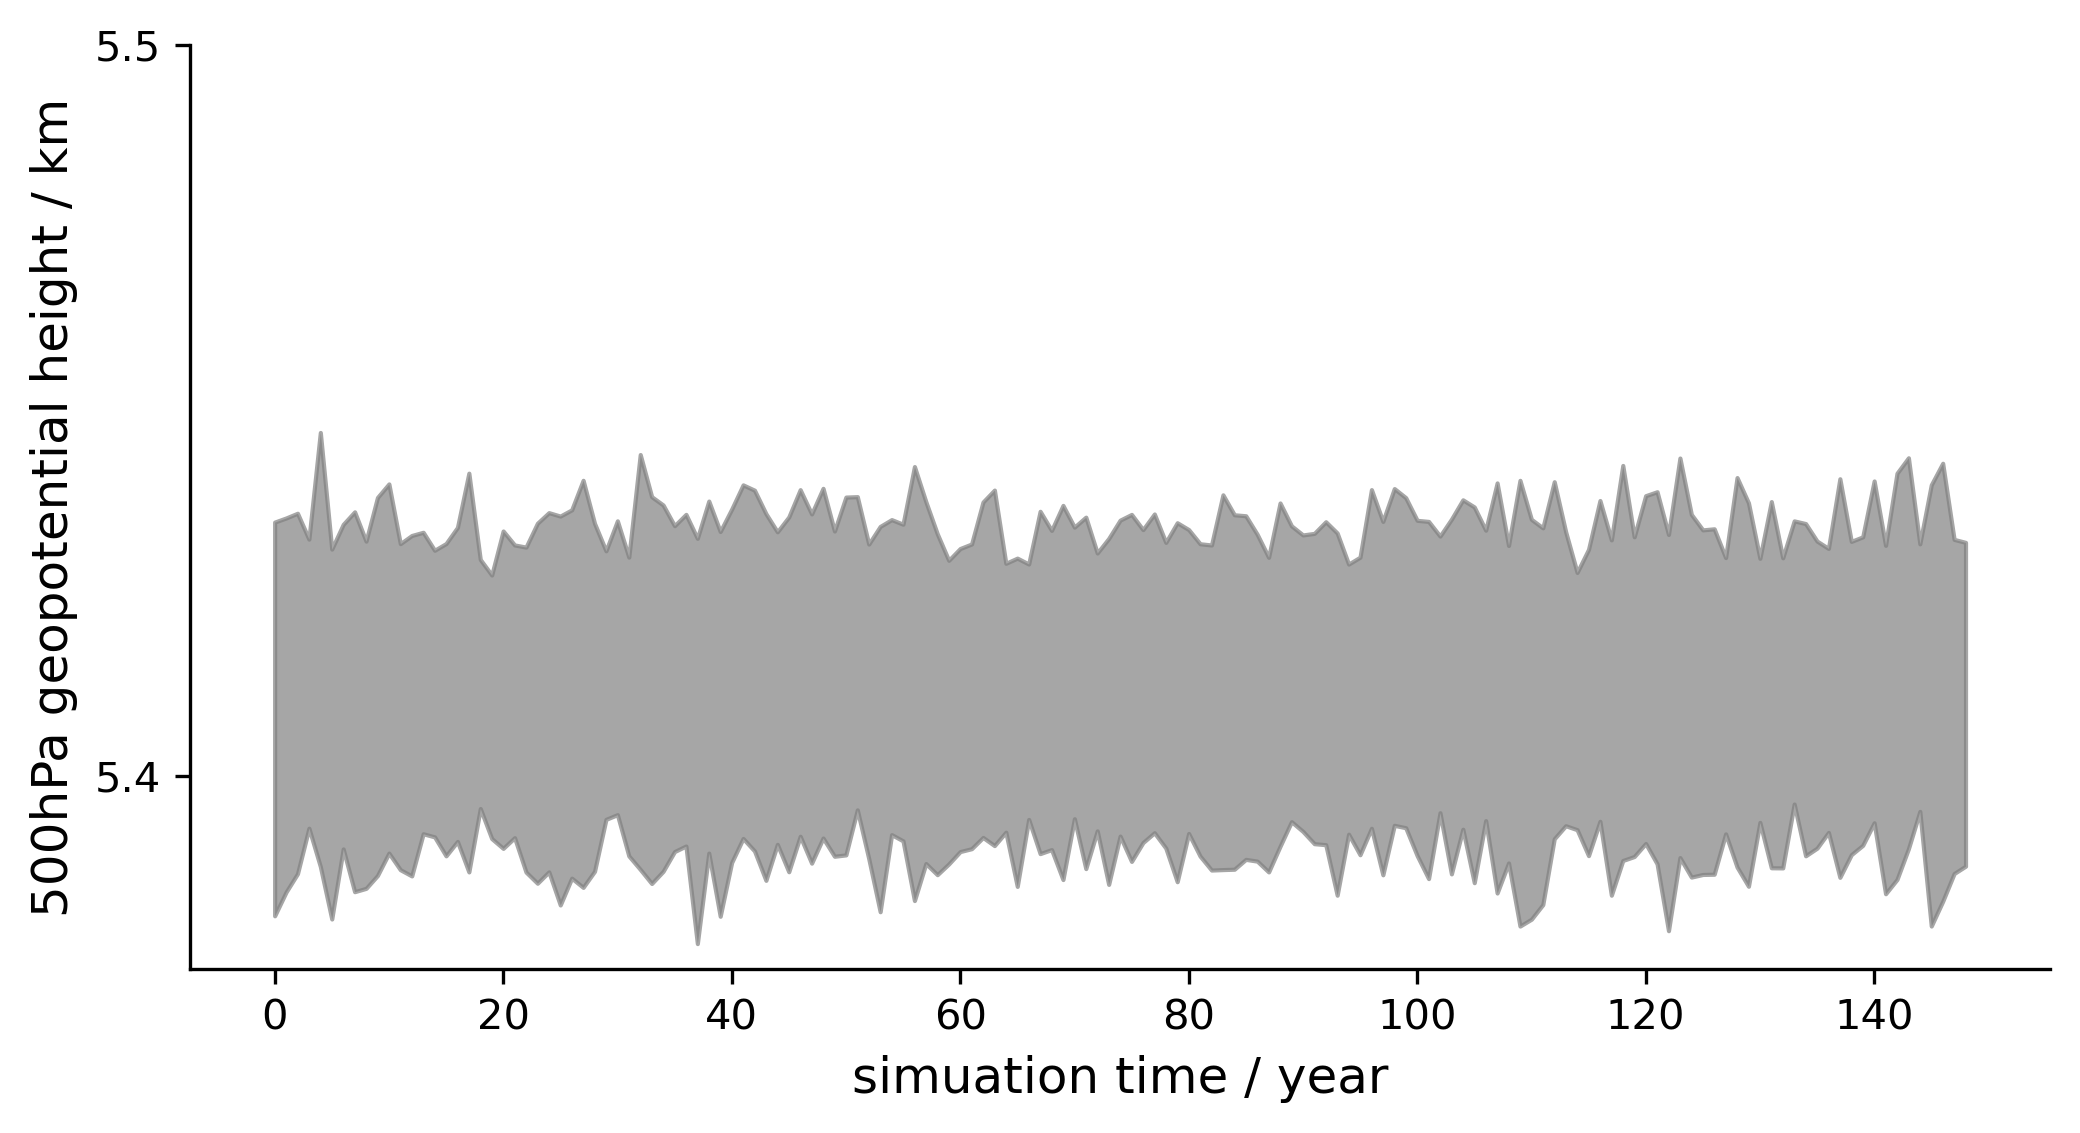

In [24]:
# fig with 300 dpi
plt.figure(figsize = (8,4),dpi = 300)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.fill_between(np.arange(0,149),spm_demeanmax.values,spm_demeanmin.values, color = 'gray', alpha = 0.7)

# no boundary line in upper and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ylalbel as "500hPa geopotential height (km)"
plt.ylabel("500hPa geopotential height / km", fontsize = 12)
# x label as "simuation time (year)"
plt.xlabel("simuation time / year", fontsize = 12)

# only show the yticks and labels on [5.4,5.5]
plt.yticks(np.arange(5.4,5.6,0.1),np.arange(5.4,5.6,0.1))



([<matplotlib.axis.YTick at 0x7f28ae1e46d0>,
 [Text(0, 5.4, '5.4'), Text(0, 5.5, '5.5')])

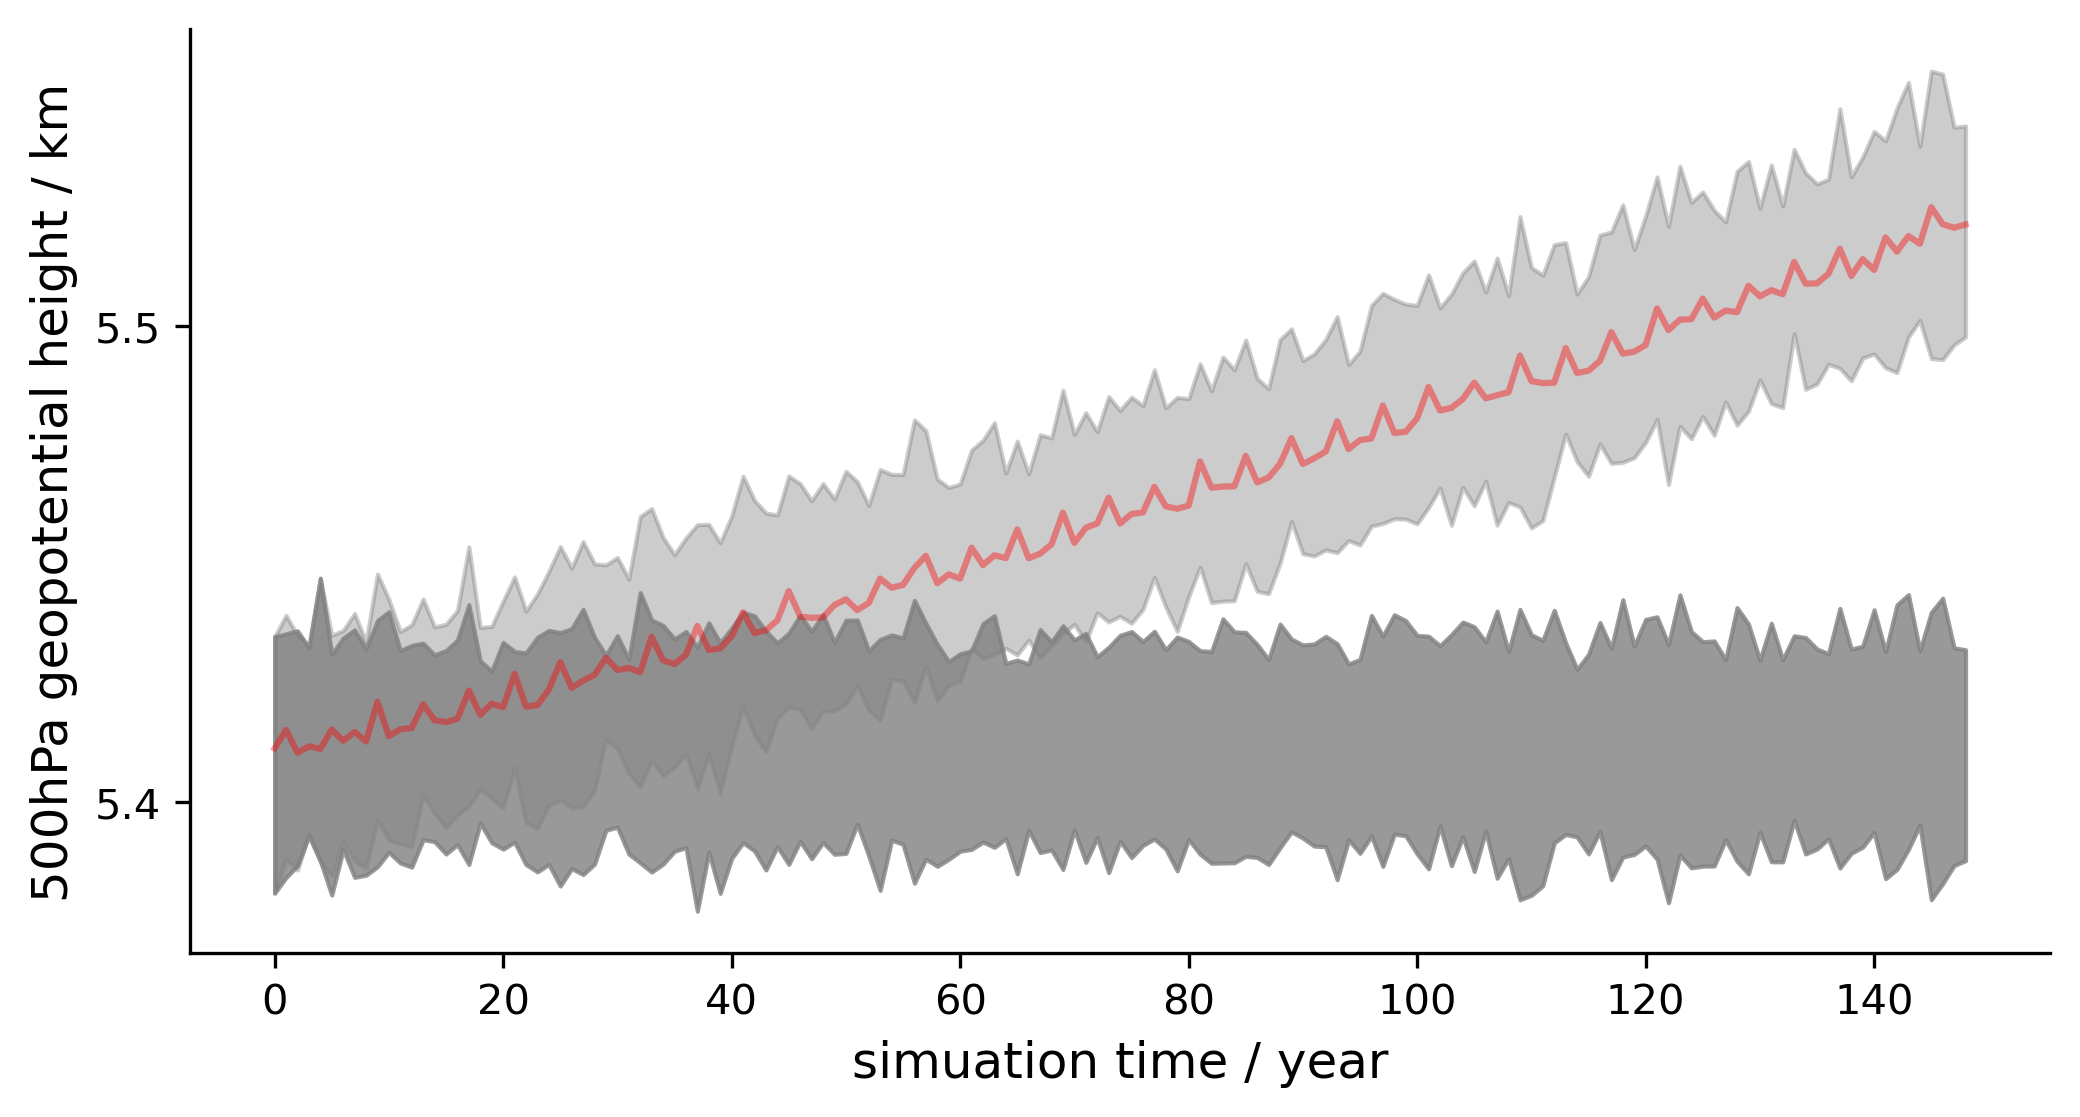

In [28]:
# fig with 300 dpi
plt.figure(figsize = (8,4),dpi = 300)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.plot(np.arange(0,149),spm_ensmean,color = 'red',alpha = 0.4)
plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0.4)
# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.fill_between(np.arange(0,149),spm_demeanmax.values,spm_demeanmin.values, color = 'gray', alpha = 0.8)

# no boundary line in upper and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ylalbel as "500hPa geopotential height (km)"
plt.ylabel("500hPa geopotential height / km", fontsize = 12)
# x label as "simuation time (year)"
plt.xlabel("simuation time / year", fontsize = 12)

# only show the yticks and labels on [5.4,5.5]
plt.yticks(np.arange(5.4,5.6,0.1),np.arange(5.4,5.6,0.1))




([<matplotlib.axis.YTick at 0x7f28aa819c30>,
 [Text(0, 5.4, '5.4'), Text(0, 5.5, '5.5')])

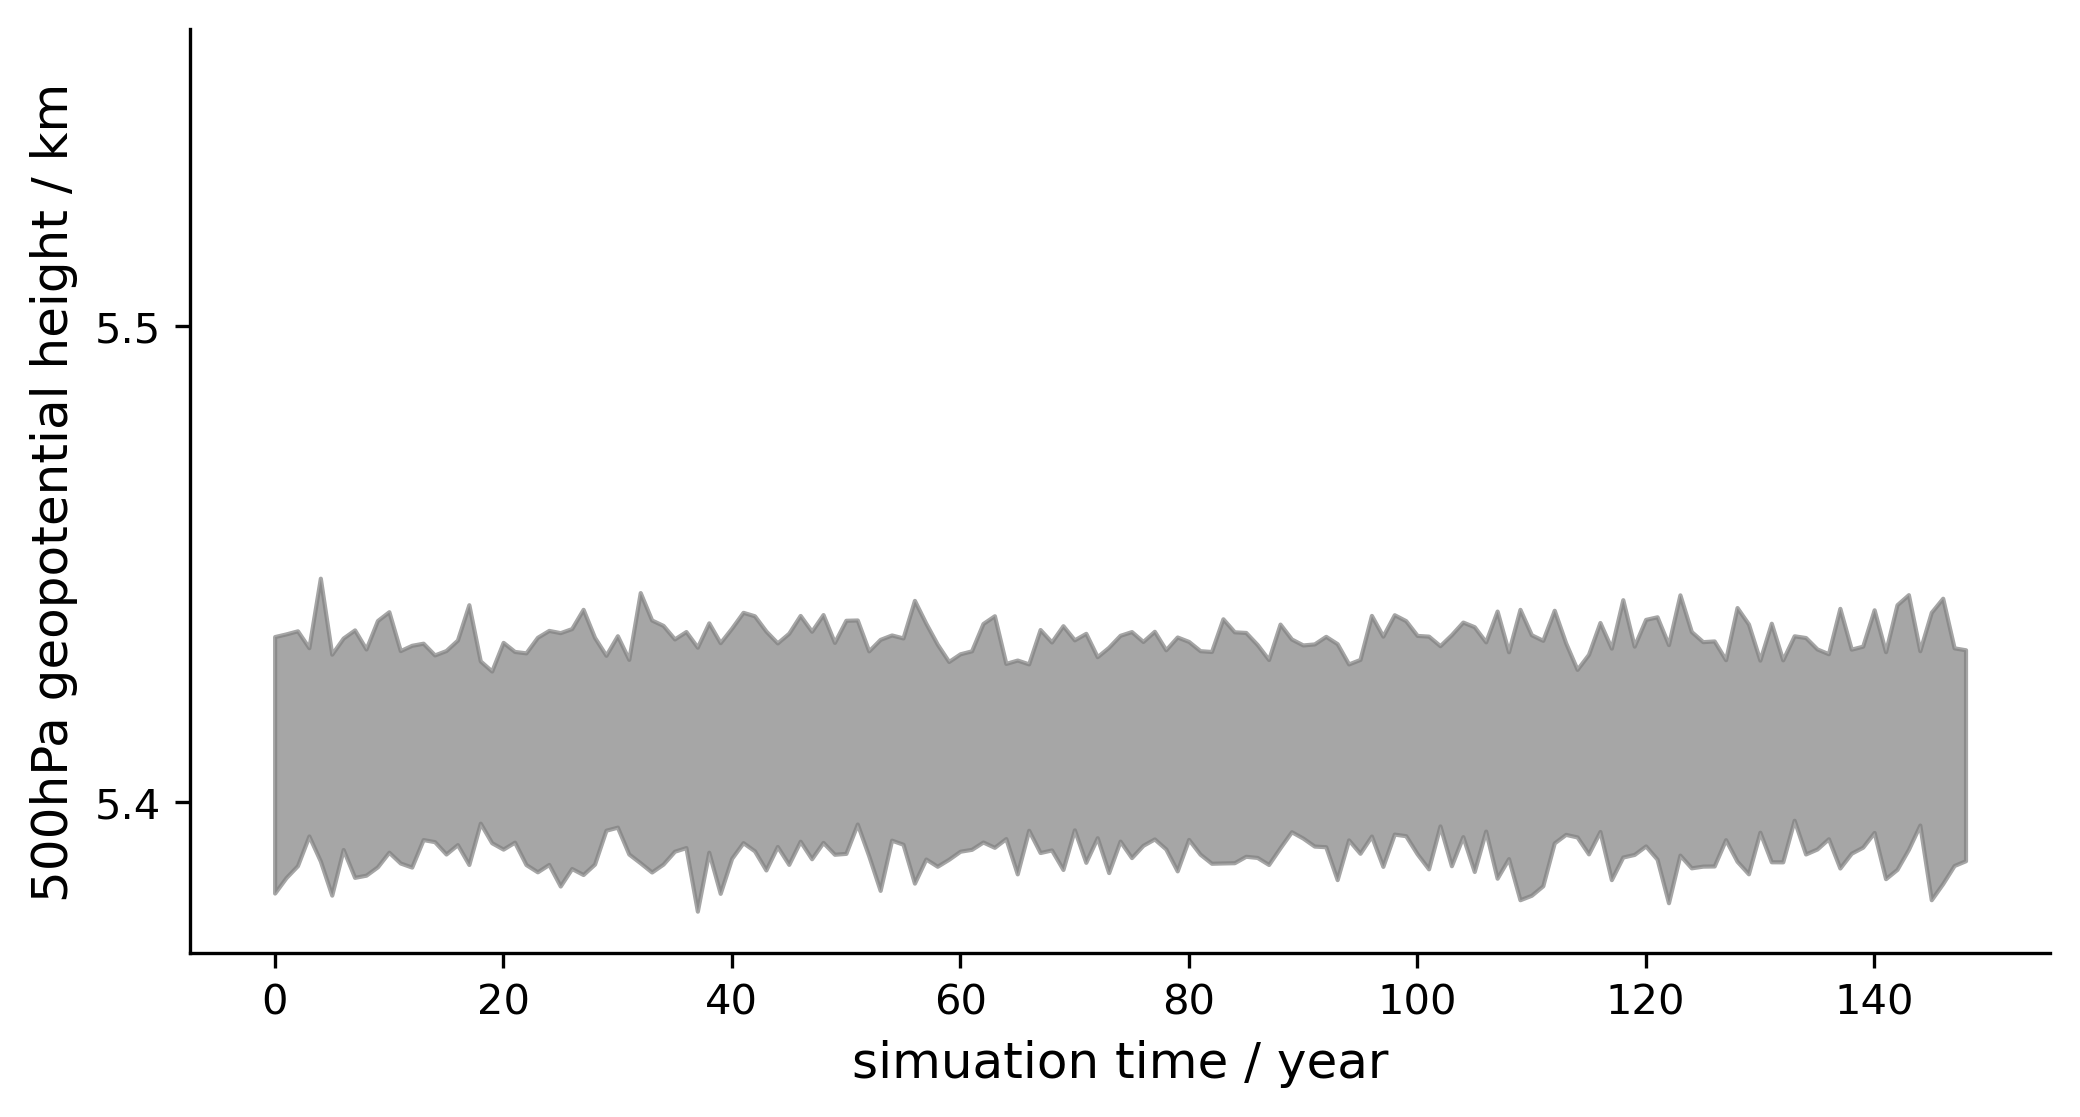

In [39]:
# fig with 300 dpi
plt.figure(figsize = (8,4),dpi = 300)

# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.plot(np.arange(0,149),spm_ensmean,color = 'red',alpha = 0)
plt.fill_between(np.arange(0,149),spm_max.values,spm_min.values, color = 'gray', alpha = 0)
# plot the spm_ensmean as red line, and the area between spm_max and spm_min as gray area
plt.fill_between(np.arange(0,149),spm_demeanmax.values,spm_demeanmin.values, color = 'gray', alpha = 0.7)

# no boundary line in upper and right
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# ylalbel as "500hPa geopotential height (km)"
plt.ylabel("500hPa geopotential height / km", fontsize = 12)
# x label as "simuation time (year)"
plt.xlabel("simuation time / year", fontsize = 12)

# only show the yticks and labels on [5.4,5.5]
plt.yticks(np.arange(5.4,5.6,0.1),np.arange(5.4,5.6,0.1))


